# Similarity of Adverse Event Reports Using NLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_colwidth=500

# DataFrame after Device_problems categories reduction

In [3]:
df=pd.read_csv("CBK2020transformed.csv")
df.sample(n=1)

,Unnamed: 0,Device_Problems,Event_description,Narrative,Event_description_Narrative
820,820,Mechanical_Problems,it was reported that while in use on a patient a 980 ventilator went into a ventilator inoperative status the patient was removed from the ventilator and placed on an alternate ventilator with no harm or injury,device evaluation summary the service engineer se evaluated the device and replaced the direct current dc to dc printed circuit board pcb the ventilator passed all testing per manufacturing specification and was placed back into clinical use if the replaced part is returned for failure investigation a supplemental medwatch report with the findings will be submitted once the investigation is complete if information is provided in the future a supplemental report will be issued,it was reported that while in use on a patient a 980 ventilator went into a ventilator inoperative status the patient was removed from the ventilator and placed on an alternate ventilator with no harm or injurydevice evaluation summary the service engineer se evaluated the device and replaced the direct current dc to dc printed circuit board pcb the ventilator passed all testing per manufacturing specification and was placed back into clinical use if the replaced part is returned for failur...


In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df=df.drop(df.columns[[0]], axis = 1)
print(len(pd.DataFrame(df)))
df.head()

5383


,Device_Problems,Event_description,Narrative,Event_description_Narrative
0,Calibration_Problems,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incident,the device was returned to an authorized resmed third party service center for an evaluation and service the customer was issued with a replacement nonreturn valve nrv assembly as a part of a warranty claim b4,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incidentthe device was returned to an authorized resmed third party service center for an evaluation and service the customer was issued with a replacement nonreturn valve nrv assembly as a part of a warranty claim b4
1,Circuit_failure,complainant alleged that while attempting to treat a patient age gender unknown the device did not operate correctly this is all the information available at this time complainant did not indicate that there was any adverse effect to the patient due to the reported malfunction,zoll medical corporation has not received the device for evaluation and this complaint is still under investigation,complainant alleged that while attempting to treat a patient age gender unknown the device did not operate correctly this is all the information available at this time complainant did not indicate that there was any adverse effect to the patient due to the reported malfunctionzoll medical corporation has not received the device for evaluation and this complaint is still under investigation
2,Mechanical_Problems,the customer reported that the avea ventilators vte was reading 1 69 monitored and 878 delivered when set at 500 vti was way off as well and peep was reading 8 8 when set at 6 the customer confirmed that there was no patient involvement associated with the reported event,vyaire complaint b4 at this time vyaire has not received the suspect devicecomponent for evaluation,the customer reported that the avea ventilators vte was reading 1 69 monitored and 878 delivered when set at 500 vti was way off as well and peep was reading 8 8 when set at 6 the customer confirmed that there was no patient involvement associated with the reported eventvyaire complaint b4 at this time vyaire has not received the suspect devicecomponent for evaluation
3,Mechanical_Problems,the customer reported to vyaire medical that the vela ventilator fio2 is out of spec at this time there is no information about patient involvement on the reported event,b4 any additional information received from the customer will be included in a followup report at this time the suspect device has not been returned for evaluation therefore no root cause could be determined yet,the customer reported to vyaire medical that the vela ventilator fio2 is out of spec at this time there is no information about patient involvement on the reported eventb4 any additional information received from the customer will be included in a followup report at this time the suspect device has not been returned for evaluation therefore no root cause could be determined yet
4,Calibration_Problems,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incident,the device was returned to resmed and an evaluation confirmed the complaint the nonreturn valve assembly nrv will need to be replaced to address the issue b4,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incidentthe device was returned to resmed and an evaluation confirmed the complaint the nonreturn valve assembly nrv will need to be replaced to address the issue b4


# Corpus 

# Each corpus represents documents of the same Device_problem category

In [5]:
DI=0      # desired initial index
DE=5383   # desired end index
#Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values.
# in list form
P_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Power_Problems').dropna()))[:24]
C_F_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Circuit_failure').dropna()))[:24]
M_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Mechanical_Problems').dropna()))[:24]
S_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Software_Problems').dropna()))[:24]
C_P_list=(list(df['Event_description_Narrative'][DI:DE].where(df['Device_Problems'] == 'Calibration_Problems').dropna()))[:24]
num_P_P = len(P_P_list)
print(P_P_list[:3])
print("A total of " + str(num_P_P) + " Power_Problems have been collected")

['the customer reported battery needs replaced it is unknown if the ventilator was being used on a patient at the time that the error was discovered confirmation has been requesteddate of event b6 2020 date of report 24apr2020', 'the customer reported a ventilator that would not charge the battery there was no patient involvementdate of event b6 2020 date of report 28apr2020', 'it was reported to resmed that an astral device had a power source detection issue there was no patient harm or a serious injury reported as a result of this incidentthe device was returned to resmed and an evaluation confirmed the complaint the main circuit board will be replaced to address the issue resmed reference b4']
A total of 24 Power_Problems have been collected


# Pairs of documents

In [6]:
# label Documents as Document_1, Document_2 .. Document_n
Documentids = ["Document_" + str(i) for i in range(num_P_P)]

# create a dictionary
Document_dict = dict(zip(Documentids, P_P_list))

# get all the book ids in a list
ids = list(Document_dict.keys())
#print((ids))

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 10 pairs: ")
display(pairs[:10])
print("....")
print("Displaying last 10 pairs: ")
display(pairs[-10:])

There are a total of 276 pairs
Displaying first 10 pairs: 


[('Document_0', 'Document_1'),
 ('Document_0', 'Document_2'),
 ('Document_0', 'Document_3'),
 ('Document_0', 'Document_4'),
 ('Document_0', 'Document_5'),
 ('Document_0', 'Document_6'),
 ('Document_0', 'Document_7'),
 ('Document_0', 'Document_8'),
 ('Document_0', 'Document_9'),
 ('Document_0', 'Document_10')]

....
Displaying last 10 pairs: 


[('Document_19', 'Document_20'),
 ('Document_19', 'Document_21'),
 ('Document_19', 'Document_22'),
 ('Document_19', 'Document_23'),
 ('Document_20', 'Document_21'),
 ('Document_20', 'Document_22'),
 ('Document_20', 'Document_23'),
 ('Document_21', 'Document_22'),
 ('Document_21', 'Document_23'),
 ('Document_22', 'Document_23')]

# Functions for pre-processing and plotting

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df_hm, xlabels, ylabels):
    """
    Given a dataframe containing similarity grid, plot the heatmap
    """
    sns.set(style="white")

    # Set up the matplotlib figure
    # (to enlarge the cells, increase the figure size)
    f, ax = plt.subplots(figsize=(8, 8))

    # Generate a custom diverging colormap
    #cmap = sns.color_palette("rocket_r", as_cmap=True)
    #"magma"
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=1,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.005, fmt='.2f', vmax=1)

    ax.set_title("Cosine similarity scores Power_Problems documents").set_fontsize(15)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax



import re
import pandas as pd
import numpy as np
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# tokenize text
def tokenize_text(document_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(document_text)
    return word_tokens

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def apply_lemmatization(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

def cleanTextdocuments(document_texts):
    clean_documents = []
    for document in document_texts:
        document_i = tokenize_text(document)
        document_i = remove_stopwords(document_i)
        document_i = apply_lemmatization(document_i)
        clean_documents.append(document_i)
    return clean_documents



# Clean data in the Corpus [from Stop words and applying lemmatization]

In [29]:
# cleanTextBooks takes a list of strings and returns a list of lists
corpus = cleanTextdocuments(P_P_list)
# convert list of lists into a list of strings
norm_Document_corpus = [' '.join(text) for text in corpus]

# display normalized corpus
display(norm_Document_corpus[:3])

['customer reported battery need replaced unknown ventilator used patient time error discovered confirmation requesteddate event b6 2020 date report 24apr2020',
 'customer reported ventilator would charge battery patient involvementdate event b6 2020 date report 28apr2020',
 'reported resmed astral device power source detection issue patient harm serious injury reported result incidentthe device returned resmed evaluation confirmed complaint main circuit board replaced address issue resmed reference b4']

# TF-IDF ( Vectorization )

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
vectorizer

TfidfVectorizer(min_df=0.0)

In [33]:
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=np.float64, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

TfidfVectorizer(min_df=0.0)

In [34]:
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(norm_Document_corpus).astype(float)

# display the shape of feature matrix
display(feature_matrix.shape)

# display the first feature vector
display(feature_matrix[0])

# display the dense version of the feature vector
display(feature_matrix.toarray()[0])

# display the shape of dense feature vector
display(feature_matrix.toarray()[0].shape)

# display the first document text
display(norm_Document_corpus[0])

(24, 180)

<1x180 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

array([0.        , 0.        , 0.        , 0.        , 0.21628504,
       0.        , 0.29223243, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21628504, 0.        , 0.13094433, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.29223243, 0.        , 0.        ,
       0.        , 0.        , 0.11485158, 0.        , 0.21628504,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29223243,
       0.        , 0.        , 0.        , 0.        , 0.25862517,
       0.        , 0.        , 0.15883307, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(180,)

'customer reported battery need replaced unknown ventilator used patient time error discovered confirmation requesteddate event b6 2020 date report 24apr2020'

# Cosine Similarity

In [35]:
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    document1, document2 = pair

    # split on _ and get index
    document1_index = int(document1.split("_")[1])
    document2_index = int(document2.split("_")[1])

    # get the feature matrix of the document
    document1_fm = feature_matrix.toarray()[document1_index]
    document2_fm = feature_matrix.toarray()[document2_index]

    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(document1_fm, document2_fm)

    return manual_cosine_similarity

# Cosine Similarity Scores

In [37]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

,pair,similarity
0,"(Document_0, Document_1)",0.396670
1,"(Document_0, Document_2)",0.047835
2,"(Document_0, Document_3)",0.067964
3,"(Document_0, Document_4)",0.086777
4,"(Document_0, Document_5)",0.038350


,pair,similarity
271,"(Document_20, Document_22)",0.406939
272,"(Document_20, Document_23)",0.347811
273,"(Document_21, Document_22)",0.371152
274,"(Document_21, Document_23)",0.393883
275,"(Document_22, Document_23)",0.594055


# Heatmap Plot

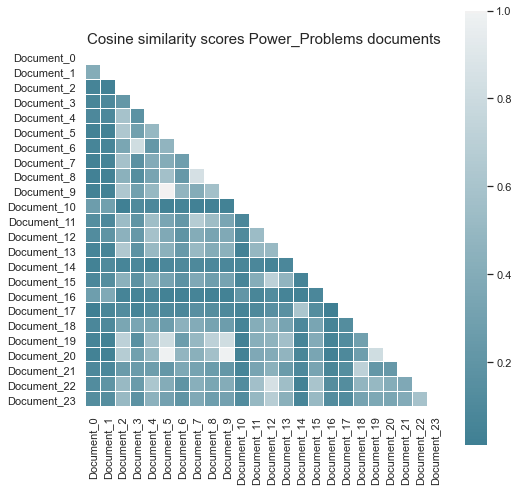

In [38]:
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(num_P_P), 'cols': range(num_P_P), 'vals': pd.Series(np.zeros(num_P_P))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['Doucument1'] = list1
df_temp['Doucument2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['Doucument1'] = df_temp['Doucument1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['Doucument2'] = df_temp['Doucument2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.Doucument1, df_temp.Doucument2, round(df_temp.similarity, 2)))

# display(df_temp.head())

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

ax = plot_heatmap(df_hm, ids, ids)

# Max Similarity Score and Min 

In [39]:
df.loc[[df.similarity.values.argmax(), df.similarity.values.argmin()]]

,pair,similarity
108,"(Document_5, Document_9)",1.00000
16,"(Document_0, Document_17)",0.01098


In [40]:
print("Most similar books are: ")
print(Document_dict['Document_5'])
print(" and ")
print(Document_dict['Document_9'])

Most similar books are: 
it was reported to resmed that an astral device had a power source detection issue there was no patient harm or serious injury reported as a result of this incidentthe device was returned to resmed and an evaluation confirmed the complaint the main circuit board was replaced to address this issue the device was serviced and fully tested before it was returned to the customer based on all available evidence and complaint investigations of a similar nature an investigation determined that the reported complaint was due to an isolated component failure within the device main circuit board pcba resmeds risk analysis for this failure mode concludes that the risk is acceptable b4
 and 
it was reported to resmed that an astral device had a power source detection issue there was no patient harm or serious injury reported as a result of this incidentthe device was returned to resmed and an evaluation confirmed the complaint the main circuit board was replaced to address

In [41]:
print("Most dissimilar books are: ")
print(Document_dict['Document_0'])
print(" and ")
print(Document_dict['Document_17'])

Most dissimilar books are: 
the customer reported battery needs replaced it is unknown if the ventilator was being used on a patient at the time that the error was discovered confirmation has been requesteddate of event b6 2020 date of report 24apr2020
 and 
complainant alleged that during a routine shift check by a clinician the device would not power up complainant indicated that there was no patient involvement in the reported malfunctionthe complainant was contacted for return of the device the device has not been returned to zoll for evaluation
